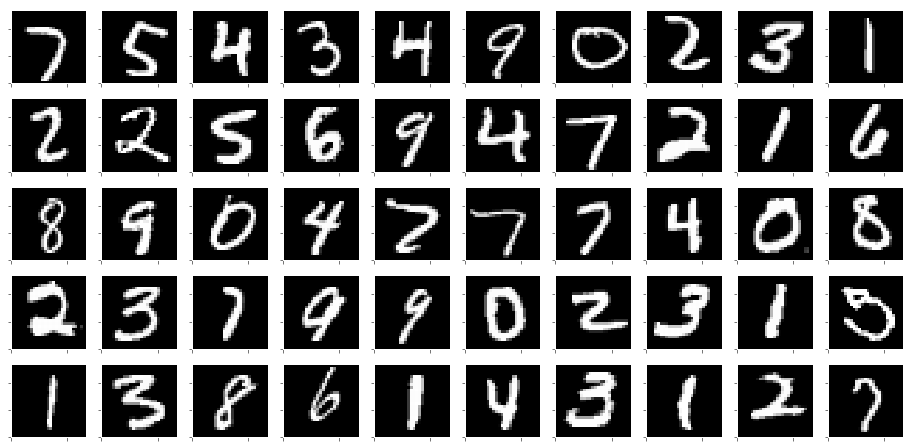

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

import chainer

import chainer.links as L
import chainer.functions as F

from chainer import training
from chainer import optimizers
from chainer.training import extensions

import sys

plt.style.use('ggplot')

train, test = chainer.datasets.get_mnist()

def draw_digit(data, n):
    size = 28
    plt.subplot(10, 10, n)
    X, Y = np.meshgrid(range(size), range(size))
    Z = np.reshape(data,(size, size))
    Z = Z[::-1, :]
    plt.xlim(0,size-1)
    plt.ylim(0,size-1)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")  
    
    
plt.figure(figsize=(16,16))
cnt = 1
for i in np.random.permutation(len(train))[:50]:
    draw_digit(train[i][0],cnt)
    cnt+=1
    
plt.show()

In [4]:
batchsize = 100
epoch = 20
units = 1000
gpu = -1 # GPUを使わない
choises = 10

class MnistModel(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MnistModel, self).__init__(
            l1=L.Linear(None, n_units),
            l2=L.Linear(None, n_units),
            l3=L.Linear(None, n_out),
        )

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
    
model = L.Classifier(MnistModel(units,choises))
optimizer = optimizers.Adam()
optimizer.setup(model)

train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,repeat=False, shuffle=False)

updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result')

trainer.extend(extensions.Evaluator(test_iter, model, device=gpu))

trainer.extend(extensions.snapshot(), trigger=(epoch, 'epoch'))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss','main/accuracy', 'validation/main/accuracy']))

trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy
1           0.190179    0.104788              0.941733       0.9685                    
2           0.075409    0.0864711             0.976667       0.9732                    
3           0.0483287   0.0938551             0.984333       0.9703                    
4           0.0346131   0.0736401             0.988867       0.978                     
5           0.0292532   0.0735051             0.99075        0.9801                    
6           0.0257798   0.070639              0.99165        0.9816                    
7           0.0174151   0.0893139             0.994033       0.9782                    
8           0.0220336   0.0905241             0.992733       0.9784                    
9           0.017825    0.0754982             0.99415        0.9819                    
10          0.013701    0.100887              0.995483       0.9781                    
11          0.014049    0.0985296 

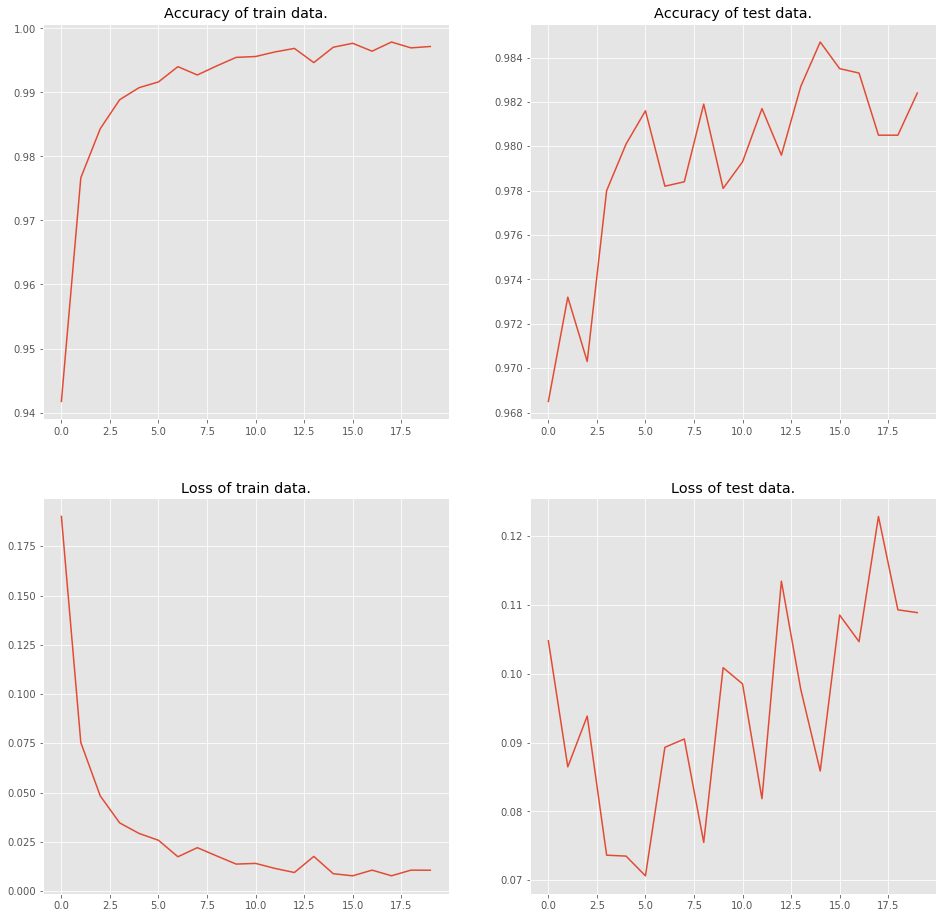

In [5]:
with open('result/log') as data_file:    
    data = json.load(data_file)
    
    plt.figure(figsize=(16,16))
    
    plt.subplot(2,2,1)
    plt.plot(range(len(data)), [d['main/accuracy'] for d in data])
    plt.title("Accuracy of train data.")
    
    plt.subplot(2,2,2)
    plt.plot(range(len(data)), [d['validation/main/accuracy'] for d in data])
    plt.title("Accuracy of test data.")
    
    plt.subplot(2,2,3)
    plt.plot(range(len(data)), [d['main/loss'] for d in data])
    plt.title("Loss of train data.")
    
    plt.subplot(2,2,4)
    plt.plot(range(len(data)), [d['validation/main/loss'] for d in data])
    plt.title("Loss of test data.")
    
    plt.show()
    
# https://deepage.net/machine_learning/2016/12/13/jupyter_notebook.html